In [1]:
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np

Görüntü boyutları: (264, 264)
Bu görüntü tek kanallı (grayscale).


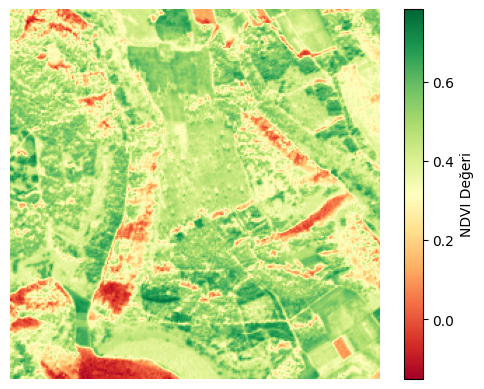

In [3]:
epsilon = 1e-10

img_red = tiff.imread("/media/kursat/TOSHIBA EXT43/projects/satellite/YENI/visual-language-model/mixture_of_experts/ssl4eo-s12_100patches/s2c/0000010/20201127T102401_20201127T102424_T32UMU/B4.tif")
img_nir = tiff.imread("/media/kursat/TOSHIBA EXT43/projects/satellite/YENI/visual-language-model/mixture_of_experts/ssl4eo-s12_100patches/s2c/0000010/20201127T102401_20201127T102424_T32UMU/B8.tif")

img_red = img_red.astype(np.float32)
img_nir = img_nir.astype(np.float32)

ndvi = (img_nir - img_red) / (img_nir + img_red + epsilon)
ndvi = np.clip(ndvi, -1, 1)

print("Görüntü boyutları:", ndvi.shape)
if ndvi.ndim == 2:
    print("Bu görüntü tek kanallı (grayscale).")
elif ndvi.ndim == 3:
    print("Kanal sayısı:", ndvi.shape[2])

plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI Değeri')
plt.axis("off")
plt.show()

Görüntü boyutları: (264, 264, 3)


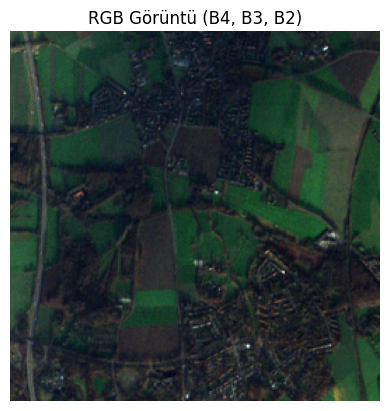

In [2]:
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt

# Sentinel-2 bantlarının dosya yollarını belirleyin (dosya yollarını kendi verinize göre ayarlayın)
path_b2 = "/media/kursat/TOSHIBA EXT48/projects/satellite/YENI/visual-language-model/mixture_of_experts/SSL4EO-S12-main/src/download_data/data/imgs/000003/20201218T104349_20201218T104343_T31UGT/B2.tif"  # Mavi
path_b3 = "/media/kursat/TOSHIBA EXT48/projects/satellite/YENI/visual-language-model/mixture_of_experts/SSL4EO-S12-main/src/download_data/data/imgs/000003/20201218T104349_20201218T104343_T31UGT/B3.tif"  # Yeşil
path_b4 = "/media/kursat/TOSHIBA EXT48/projects/satellite/YENI/visual-language-model/mixture_of_experts/SSL4EO-S12-main/src/download_data/data/imgs/000003/20201218T104349_20201218T104343_T31UGT/B4.tif"  # Kırmızı

# Bantları okuyun
img_blue = tiff.imread(path_b2)
img_green = tiff.imread(path_b3)
img_red = tiff.imread(path_b4)

# Verileri float32 tipine çevirin
img_blue = img_blue.astype(np.float32)
img_green = img_green.astype(np.float32)
img_red = img_red.astype(np.float32)

# Görselleştirme için normalizasyon fonksiyonu
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

# Her bir bandı normalize edin
img_blue_norm = normalize(img_blue)
img_green_norm = normalize(img_green)
img_red_norm = normalize(img_red)

# RGB görüntüyü oluşturun: kırmızı (B4), yeşil (B3), mavi (B2)
rgb_image = np.dstack((img_red_norm, img_green_norm, img_blue_norm))
print("Görüntü boyutları:", rgb_image.shape)

# Görüntüyü çizdirin
plt.imshow(rgb_image)
plt.axis('off')
plt.title("RGB Görüntü (B4, B3, B2)")
plt.show()


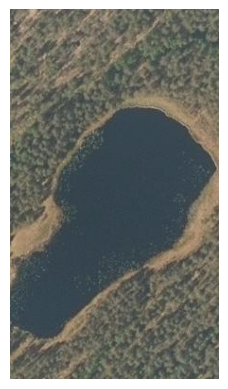

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

"""
n8454739999_US_21.jpg: A satellite view of a suburban neighborhood with houses, trees, and a pool in the background.
n4960367209_US_19: A serene path winds through a lush green forest, creating a peaceful and tranquil scene.
w917214843_US_21: A satellite view of a park with a tennis court, a playground, and a winding road, surrounded by lush greenery and trees.
"""

image_path = '/media/kursat/TOSHIBA EXT48/projects/satellite/YENI/visual-language-model/mixture_of_experts/skyscript_dataset/images2/a5198695_FI_18.jpg'
generated_path = ''
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')  
plt.show()


Görüntü boyutu: (264, 264, 13)


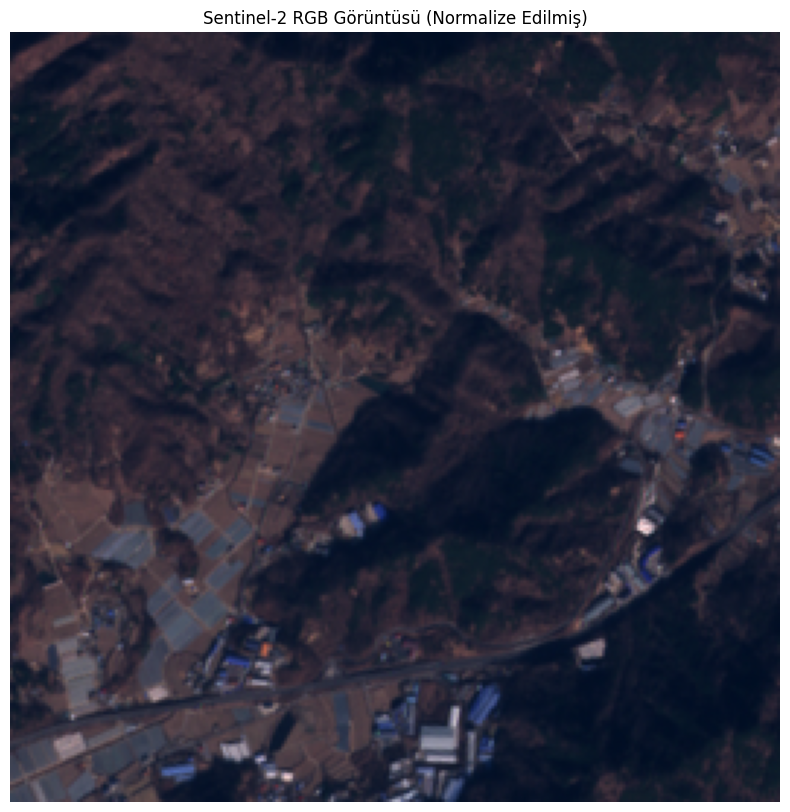

In [2]:
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np

image_path = '/media/kursat/TOSHIBA EXT48/projects/satellite/YENI/visual-language-model/mixture_of_experts/data_for_cycle_gan/sentinel2_sampled/imgs4_031290_20220104T021101_20220104T021435_T52SDE_sentinel2.tif'

img = tiff.imread(image_path)
print("Görüntü boyutu:", img.shape)

# Sentinel-2 görüntüsünün (yükseklik, genişlik, bant) formatında olduğunu varsayalım.
if img.ndim == 3 and img.shape[2] >= 4:
    # RGB için: Blue = 2. bant, Green = 3. bant, Red = 4. bant (0 tabanlı indeksleme)
    blue = img[:, :, 1]
    green = img[:, :, 2]
    red = img[:, :, 3]
    rgb = np.stack([red, green, blue], axis=-1)
elif img.ndim == 3 and img.shape[0] >= 4:
    blue = img[1]
    green = img[2]
    red = img[3]
    rgb = np.stack([red, green, blue], axis=-1)
else:
    raise ValueError("Görüntü formatı beklenenden farklı. Lütfen bant sıralamasını kontrol edin.")

# Görüntü değerlerini normalize etme (0-1 aralığına çekme)
rgb_norm = (rgb - rgb.min()) / (rgb.max() - rgb.min())

# RGB görüntüyü görselleştirme
plt.figure(figsize=(10, 10))
plt.imshow(rgb_norm)
plt.title('Sentinel-2 RGB Görüntüsü (Normalize Edilmiş)')
plt.axis('off')
plt.show()
